In [4]:
# Use GPU for Theano, comment to use CPU instead of GPU
# Tensorflow uses GPU by default
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN, device=gpu, floatX=float32"

In [5]:
# If using tensorflow, set image dimensions order
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

In [7]:
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization
%matplotlib inline
np.random.seed(2017)  

## Load MNIST Dataset  

In [9]:
from keras.datasets import mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()
_, img_rows, img_cols =  train_features.shape
num_classes = len(np.unique(train_labels))
num_input_nodes = img_rows*img_cols
#print "Number of training samples: %d"%train_features.shape[0]
#print "Number of test samples: %d"%test_features.shape[0]
#print "Image rows: %d"%train_features.shape[1]
#print "Image columns: %d"%train_features.shape[2]
#print "Number of classes: %d"%num_classes

## Pre-processing

In [10]:
train_features = train_features.reshape(train_features.shape[0], 1, img_rows, img_cols).astype('float32')
test_features = test_features.reshape(test_features.shape[0], 1, img_rows, img_cols).astype('float32')
train_features /= 255
test_features /= 255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Function to plot model accuracy and loss 

In [11]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

## Funtion to compute test accuracy

In [12]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

## A Simple CNN

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(1, 28, 28..., padding="valid")`
  This is separate from the ipykernel package so we can avoid doing imports until


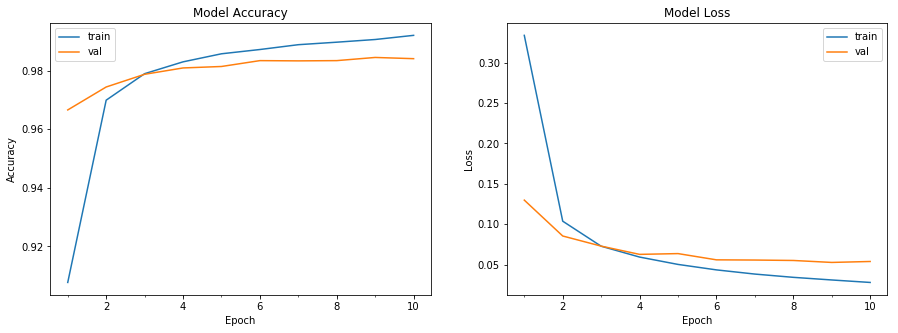

Model took 270.78 seconds to train
Accuracy on test data is: 98.61


In [15]:
# Define the model
model1 = Sequential()
model1.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, 28, 28))) 
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dense(num_classes))
model1.add(Activation("softmax"))
# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model1_info = model1.fit(train_features, train_labels, batch_size=128, \
                         epochs=10, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model1_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model1))


In [16]:
plt.savefig('output.png', dpi=300)


<Figure size 432x288 with 0 Axes>

## adding multiple layers

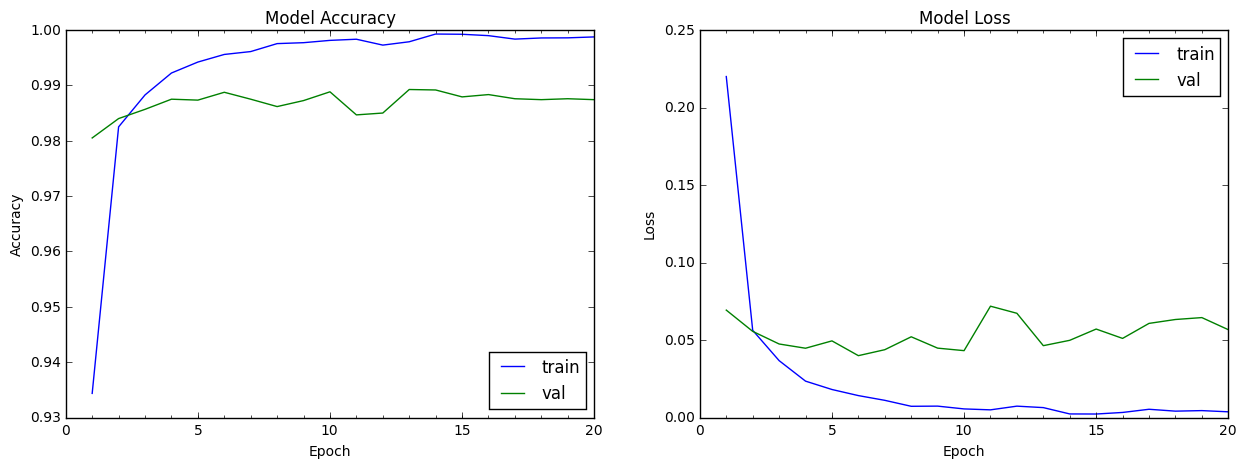

Model took 137.12 seconds to train
Accuracy on test data is: 98.78


In [9]:
# Define the model
model3 = Sequential()
model3.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=(1, 28, 28)))
model3.add(Activation("relu"))
model3.add(Convolution2D(32, 3, 3,  border_mode='valid'))
model3.add(Activation("relu"))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation("relu"))
model3.add(Dense(num_classes))
model3.add(Activation("softmax"))
# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model3_info = model3.fit(train_features, train_labels, batch_size=128, \
                         nb_epoch=20, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model3_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model3)

## Add Droput Layer

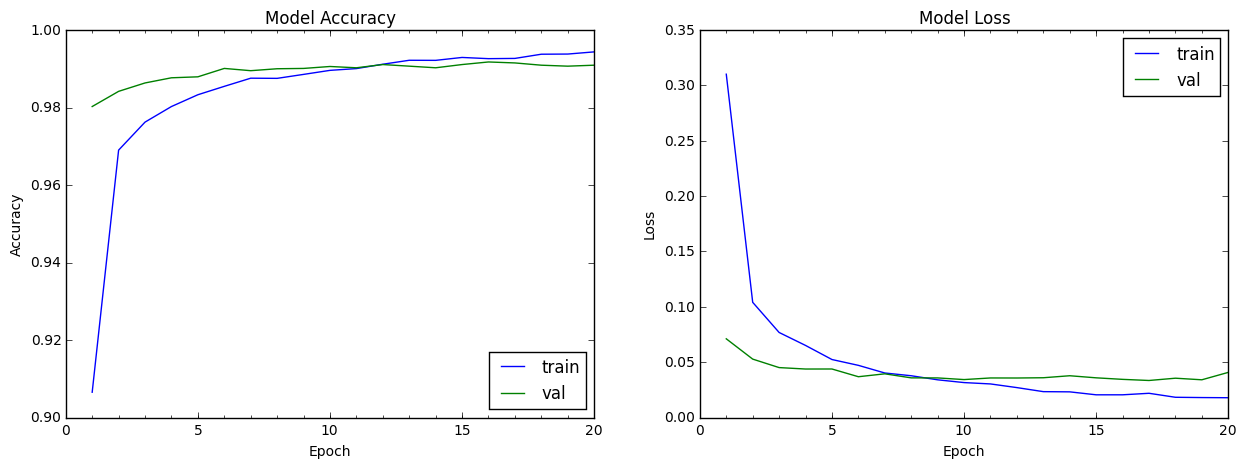

Model took 141.79 seconds to train
Accuracy on test data is: 99.21


In [10]:
# Define the model
model4 = Sequential()
model4.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=(1, 28, 28)))
model4.add(Activation("relu"))
model4.add(Convolution2D(32, 3, 3,  border_mode='valid'))
model4.add(Activation("relu"))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))
model4.add(Flatten())
model4.add(Dense(128))
model4.add(Dropout(0.5))
model4.add(Activation("relu"))
model4.add(Dense(num_classes))
model4.add(Activation("softmax"))
# Compile the model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model4_info = model4.fit(train_features, train_labels, batch_size=128, \
                         nb_epoch=20, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model4_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model4)

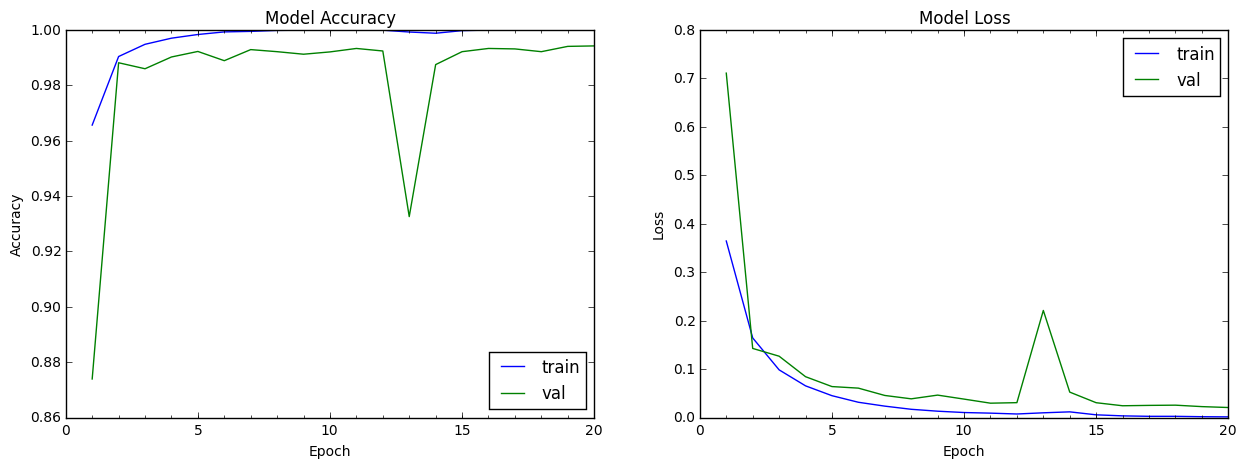

Model took 182.42 seconds to train
Accuracy on test data is: 99.30


In [11]:
# Define the model
model5 = Sequential()
model5.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=(1, 28, 28)))
model5.add(BatchNormalization())
model5.add(Activation("relu"))
model5.add(Convolution2D(32, 3, 3,  border_mode='valid'))
model5.add(BatchNormalization())
model5.add(Activation("relu"))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Flatten())
model5.add(Dense(128))
model5.add(BatchNormalization())
model5.add(Activation("relu"))
model5.add(Dense(num_classes))
model5.add(BatchNormalization())
model5.add(Activation("softmax"))
# model5 the model
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model
start = time.time()
model5_info = model5.fit(train_features, train_labels, batch_size=128, \
                         nb_epoch=20, verbose=0, validation_split=0.2)
end = time.time()
# plot model history
plot_model_history(model5_info)
print "Model took %0.2f seconds to train"%(end - start)
# compute test accuracy
print "Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model5)